# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 27th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

a) Read the image "face.png" in the folder "images" and visualize the RGB image as well as each of its channels separately (R, G, and B).
Note: Before applying the histogram, you should pass the image into float.

In [1]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
from skimage import filters, feature, exposure, img_as_float #useful for detecting edges
from skimage.color import rgb2gray, rgba2rgb #useful for converting a rgb image to gray
import scipy.ndimage as ndimage
from scipy.ndimage import convolve, filters
import skimage as ski
from skimage.transform import resize
from skimage.util import img_as_ubyte

In [2]:
def visualize_21(img,img2,img3,img4):
    fig=plt.figure(figsize=(20,20))
    fig.add_subplot(1,4,1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

    fig.add_subplot(1,4,2)
    plt.imshow(img2, cmap='Reds') #Visualizing the red channel
    plt.xticks([])
    plt.yticks([])

    fig.add_subplot(1,4,3)
    plt.imshow(img3, cmap='Greens') #Visualizing the green channel
    plt.xticks([])
    plt.yticks([])

    fig.add_subplot(1,4,4)
    plt.imshow(img4, cmap='Blues') #Visualizing the blue channe
    plt.xticks([])
    plt.yticks([])
    plt.show()

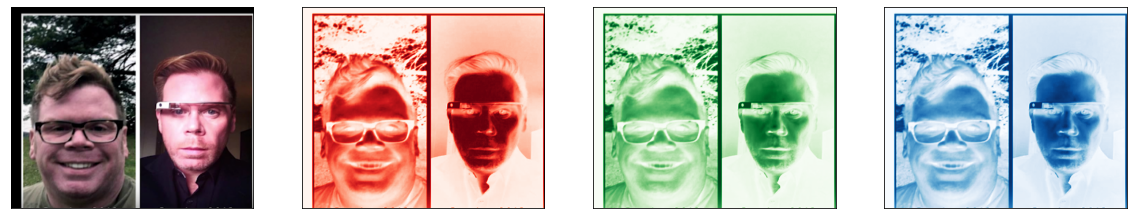

In [4]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

#We obtain each channel separately and visualize the corresponding image
img = io.imread("images/face.png")
img2 = img[:,:,0]
img3 = img[:,:,1]
img4 = img[:,:,2]

visualize_21(img,img2,img3,img4)

b) Visualize the histogram of the image. What is the histogram representing for an image? 
The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

    - Obtain the histogram with 8 and 32 bins. 

    - Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

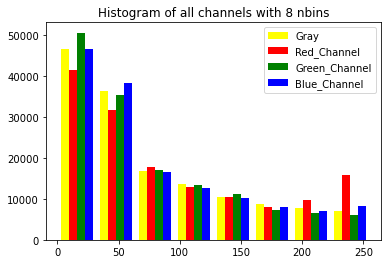

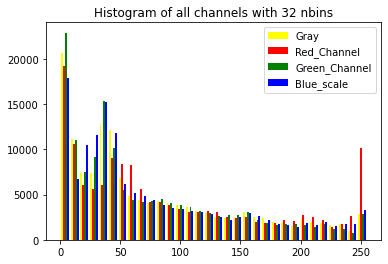

In [5]:
from skimage import img_as_ubyte

img_gray=img_as_ubyte(io.imread("images/face.png", as_gray=True))

plt.hist((img_gray.ravel(), img2.ravel(),img3.ravel(),img4.ravel()), bins=8, color=("Yellow","Red","Green","Blue"))
plt.title('Histogram of all channels with 8 nbins')
plt.legend(['Gray', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

plt.hist((img_gray.ravel(), img2.ravel(),img3.ravel(),img4.ravel()), bins=32, color=("Yellow","Red","Green","Blue"))
plt.title('Histogram of all channels with 32 nbins')
plt.legend(['Gray','Red_Channel', 'Green_Channel', 'Blue_scale'])
plt.show()

#We use the previous images and we obtain the grayscale image to compute the histograms
#It does not matter type of data the image is in, we can have it in float values or in integer values

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `face.png` and apply each of the following steps:

1. Convert it to grayscale with the function `color.rgb2gray()` of the package `skimage`.
2. Convolve it with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
3. Convolve the grayscale image in (1) with a transposed version of the mask in (2).
4. Convolve the grayscale image in (1) with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

**Visualize the output of each step (1 to 4) next to each other. Write short titles on each figure to make them understandable.**

#### Questions

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

Note: Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).

In [8]:
def visualize22a(face_gray, face_convolved, face_convolved_T, face_convolved_15, title):
    fig=plt.figure(figsize=(15,6))
    fig.add_subplot(1,4,1)
    plt.imshow(face_gray, vmin=0, vmax=1,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
    fig.add_subplot(1,4,2)
    plt.imshow(face_convolved, vmin=0, vmax=1,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title('horizontal '+title)

    fig.add_subplot(1,4,3)
    plt.imshow(face_convolved_T, vmin=0, vmax=1,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title('vertical '+title)

    fig.add_subplot(1,4,4)
    plt.imshow(face_convolved_15, vmin=0, vmax=1,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title('bidimensional '+title)


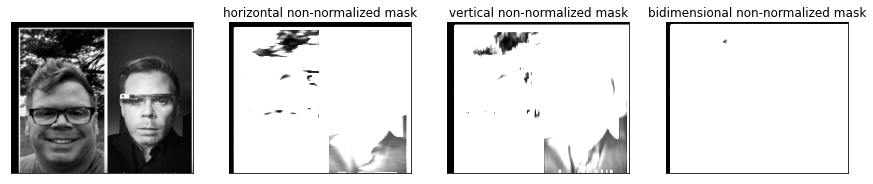

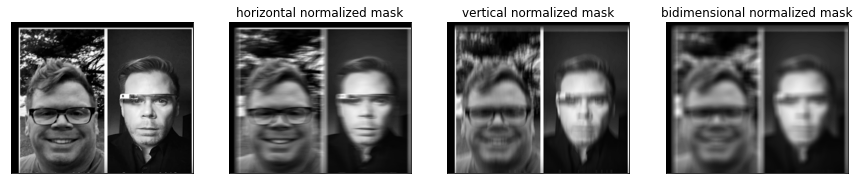

In [10]:
#your solution
face = io.imread("images/face.png")
face_gray = rgb2gray(face)

mask_h1d = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]], dtype='float')
mask_h2d= np.ones((15,15))

face_convolved=convolve(face_gray,mask_h1d) #Convolution horizontal mask 
face_convolved_T=convolve(face_gray,mask_h1d.T) #Convolution vertical mask
face_convolved_15 = convolve(face_gray, mask_h2d) #Convolution bidimensional mask

visualize22a(face_gray, face_convolved, face_convolved_T, face_convolved_15, 'non-normalized mask')

face_convolved=convolve(face_gray,mask_h1d*(1/15)) #Convolution horizontal mask normalized 
face_convolved_T=convolve(face_gray,(mask_h1d*(1/15)).T) #Convolution vertical normalized mask 
face_convolved_15 = convolve(face_gray, mask_h2d*(1/(15*15))) #Convolution bidimensional normalized mask

visualize22a(face_gray, face_convolved, face_convolved_T, face_convolved_15, 'normalized mask')

#We observe that we have to normalize the mask before we convolve an image because otherwise
#it will not have the same range as the original image
#The type of the mask needs to be float, because its values are not integers, as it has to be normalized

b) Given a color image (im), what is the difference between ***1*** and ***2*** ?
   
*** 1. ***

im_2=np.array(im, dtype='float')


*** 2. ***

im_2=np.array(im)


im_2=img_as_float(im_2)

In [11]:
def visualize22b(im_2, im_3):
    fig=plt.figure(figsize=(10,10))
    fig.add_subplot(1,2,1)
    plt.imshow(im_2)
    plt.xticks([])
    plt.yticks([])
    plt.title('img with integer values ')

    fig.add_subplot(1,2,2)
    plt.imshow(im_3)
    plt.xticks([])
    plt.yticks([])
    plt.title('img with float values ')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


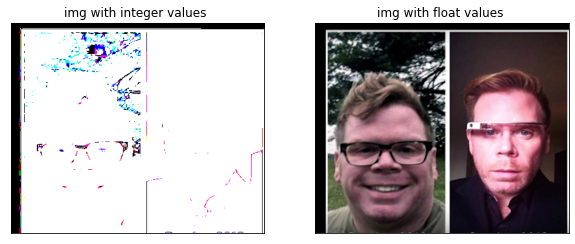

In [12]:
#your solution
from skimage import img_as_float
im_prova=io.imread("images/face.png")

im_2=np.array(im_prova, dtype='float')
im_3=np.array(im_prova)
im_3=img_as_float(im_3)
visualize22b(im_2, im_3)

#We see that if the data type of the original image is integer values, we need to use img_as_float
#to convert it properly into float values
#We run a small test to check the difference

c) Can we convolve a color (RGB) image? In order to convolve an RGB each of the channels must be convolved separately.

Implement a function that applies a 3-channel filter and visualize its result on `face.png` with a 15x15 uniform mask.

Which is the result obtained when applying a single-channel filter channel by channel separately?
Note: Before applying the convolution assure that the color image is of 3 channels and if not use rgba2rgb().

In [17]:
#your solution
#To convolve an RGB image, we convolve each channel separately
def convolution_3colors(image):
    mask3=np.ones((15,15))*(1.0/(15*15))
    new_image=image.copy()
    new_image[:,:,0]=ndimage.convolve(image[:,:,0], weights=mask3)
    new_image[:,:,1]=ndimage.convolve(image[:,:,1], weights=mask3)
    new_image[:,:,2]=ndimage.convolve(image[:,:,2], weights=mask3)

    return new_image

In [18]:
def visualize22b(im_2, im_3):
    fig=plt.figure(figsize=(10,10))
    fig.add_subplot(1,2,1)
    plt.imshow(im_2)
    plt.xticks([])
    plt.yticks([])
    plt.title('image')

    fig.add_subplot(1,2,2)
    plt.imshow(im_3)
    plt.xticks([])
    plt.yticks([])
    plt.title('convolved image')
    plt.show()

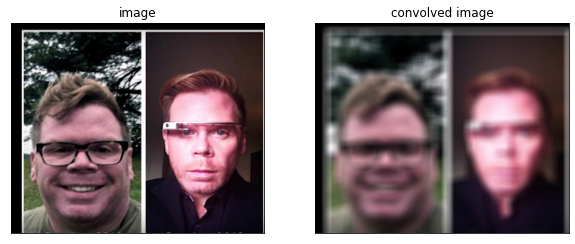

In [20]:
#your solution

face=io.imread("images/face.png")
face = rgba2rgb(face)
image_convolved=convolution_3colors(face)

visualize22b(face, image_convolved)

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms after applying the 15x15 convolution of the previous exercise.

1. Reduce it 10 times
2. Augment it 10 times. 
3. Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why.

Note: Use the command `resize` to change the size of the images.


In [21]:
def visualize23(doulphin, im_reduced, im_augmented):
    fig=plt.figure(figsize=(15,15))
    
    fig.add_subplot(1,3,1)
    plt.imshow(doulphin)
    plt.xticks([])
    plt.yticks([])
    plt.title('Original image')
    
    fig.add_subplot(1,3,2)
    plt.imshow(im_reduced)
    plt.xticks([])
    plt.yticks([])
    plt.title('Reduced image')
    
    fig.add_subplot(1,3,3)
    plt.imshow(im_augmented)
    plt.xticks([])
    plt.yticks([])
    plt.title('Augmented image')
    plt.show()


    plt.hist((doulphin[:,:,0].ravel(), doulphin[:,:,1].ravel(), doulphin[:,:,2].ravel()), bins=32, color=("Red","Green","Blue"))
    plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

    plt.hist((im_reduced[:,:,0].ravel(), im_reduced[:,:,1].ravel(), im_reduced[:,:,2].ravel()), bins=32, color=("Red","Green","Blue"))
    plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()
    
    plt.hist((im_augmented[:,:,0].ravel(), im_augmented[:,:,1].ravel(), im_augmented[:,:,2].ravel()), bins=32, color=("Red","Green","Blue"))
    plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

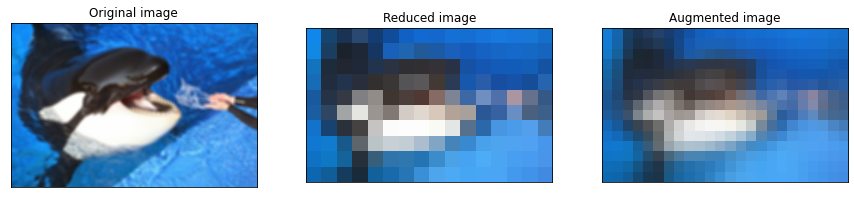

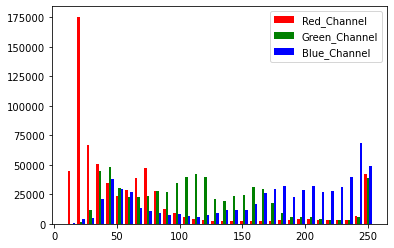

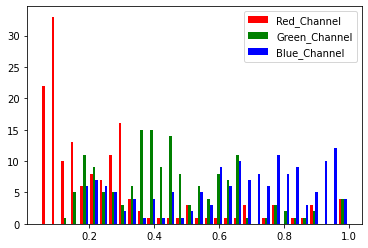

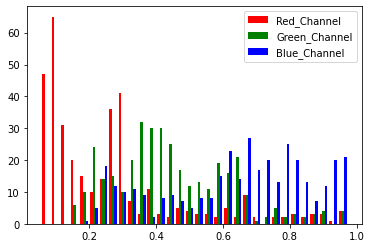

In [22]:
#your solution
doulphin = io.imread("images/doulphin.jpg")
doulphin = convolution_3colors(doulphin)
im_reduced = doulphin.copy()

#We reduce the image 10 times
i=0
while i<10:
    im_reduced=resize(im_reduced,(im_reduced.shape[0] // 1.5, im_reduced.shape[1] // 1.5))
    i+=1

#We augment the image 10 times
i=0
while i<10:
    im_augmented=resize(im_reduced,(int(im_reduced.shape[0] * 1.5), int(im_reduced.shape[1] * 1.5)))
    i+=1
    
visualize23(doulphin, im_reduced, im_augmented)

#What we see is that when we reduce the image, some of the pixels of the image get destroyed, 
#and the resulting histogram is different.
#Then, after we resize the image back to the original size, the pixels that were destroyed no longer exist,
#so the resulting histogram is still different from the original.

b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original image and calculate its histogram.
2. Convolve the  reduced image 10 times and calculate its histogram.
3. Convolve the  augmented image 10 times and calculate its histogram.

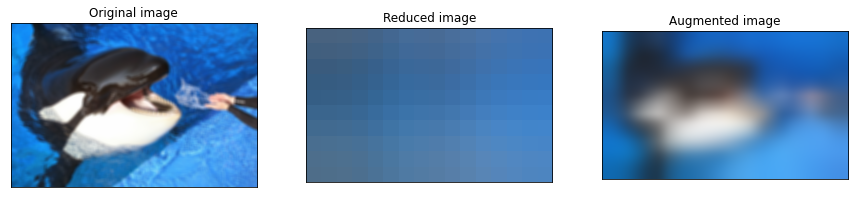

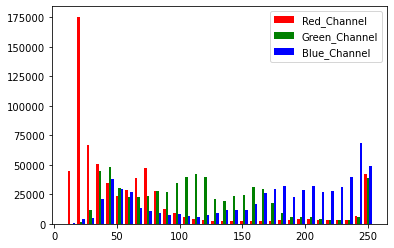

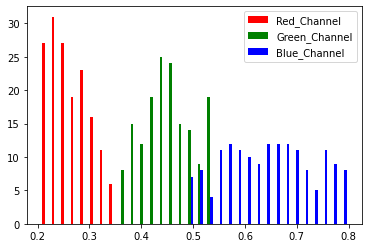

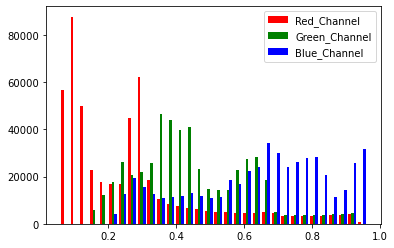

In [23]:
doulphin = io.imread("images/doulphin.jpg")

im_reduced = doulphin.copy()
doulphin = convolution_3colors(doulphin)

i=0
while i<10:
    im_reduced=resize(im_reduced,(im_reduced.shape[0] // 1.5, im_reduced.shape[1] // 1.5))
    i+=1
im_augmented=im_reduced.copy()
im_reduced = convolution_3colors(im_reduced)

i=0
while i<10:
    im_augmented=resize(im_augmented,(int(im_augmented.shape[0] * 1.5), int(im_augmented.shape[1] * 1.5)))
    i+=1

im_augmented = convolution_3colors(im_augmented)

visualize23(doulphin, im_reduced, im_augmented)

#We observe that the resulting histogram when we reduce and augment the image is different to the original one,
#but the convolution helps when trying to find the colors of the original image, so the histogram is similar

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `face.png`:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

Hint: search for the skimage.filters function for creating the different filters.

In [24]:
def visualize_24(face,face_gauss_1,face_gauss_n,face_median):
    fig=plt.figure(figsize=(20,20))
    fig.add_subplot(1,4,1)
    plt.imshow(face)
    plt.xticks([])
    plt.yticks([])
    plt.title('Original image')

    fig.add_subplot(1,4,2)
    plt.imshow(face_gauss_1)
    plt.xticks([])
    plt.yticks([])
    plt.title('Gaussian filter σ=1')

    fig.add_subplot(1,4,3)
    plt.imshow(face_gauss_n)
    plt.xticks([])
    plt.yticks([])
    plt.title('Gaussian filter σ>1')

    fig.add_subplot(1,4,4)
    plt.imshow(face_median)
    plt.xticks([])
    plt.yticks([])
    plt.title('Median filter')
    plt.show()

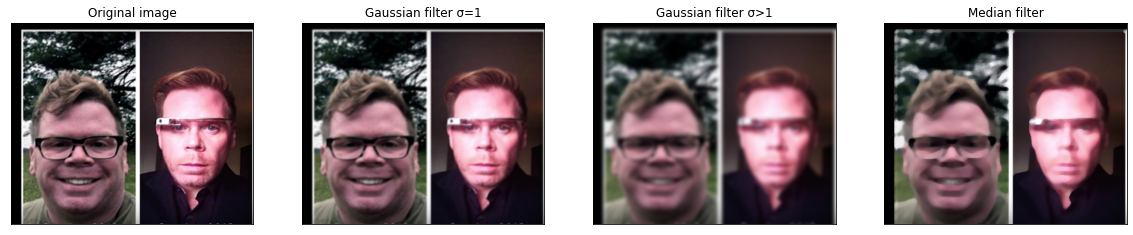

In [25]:
#your solution
from skimage.morphology import disk

face = io.imread("images/face.png")

face_gauss_1 = face.copy()
face_gauss_1 = img_as_float(face_gauss_1)
face_gauss_1[:,:,0]=ski.filters.gaussian(face[:,:,0], sigma=1)
face_gauss_1[:,:,1]=ski.filters.gaussian(face[:,:,1], sigma=1)
face_gauss_1[:,:,2]=ski.filters.gaussian(face[:,:,2], sigma=1)

face_gauss_n = face.copy()
face_gauss_n = img_as_float(face_gauss_n)
face_gauss_n[:,:,0]=ski.filters.gaussian(face[:,:,0], sigma=3)
face_gauss_n[:,:,1]=ski.filters.gaussian(face[:,:,1], sigma=3)
face_gauss_n[:,:,2]=ski.filters.gaussian(face[:,:,2], sigma=3)

face_median=face.copy()
face_median[:,:,0] = ski.filters.median(face[:,:,0], disk(5))
face_median[:,:,1] = ski.filters.median(face[:,:,1], disk(5))
face_median[:,:,2] = ski.filters.median(face[:,:,2], disk(5))

visualize_24(face,face_gauss_1,face_gauss_n,face_median)

#We observe that when we use a bigger sigma, the resulting image loses more sharpness.
#Also, the median filter loses sharpness if we use a big enough area to pick the median.

b) **(Optional)** Apply the smoothing on some other images and present their results.

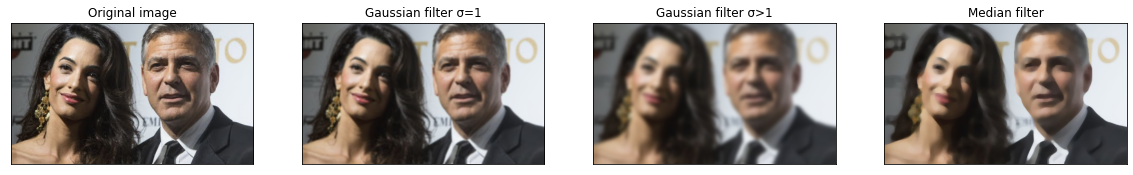

In [30]:
#your solution
from skimage.morphology import disk

clooney = io.imread("images/clooney.jpg")

clooney_gauss_1 = clooney.copy()
clooney_gauss_1 = img_as_float(clooney_gauss_1)
clooney_gauss_1[:,:,0]=ski.filters.gaussian(clooney[:,:,0], sigma=1)
clooney_gauss_1[:,:,1]=ski.filters.gaussian(clooney[:,:,1], sigma=1)
clooney_gauss_1[:,:,2]=ski.filters.gaussian(clooney[:,:,2], sigma=1)

clooney_gauss_n = clooney.copy()
clooney_gauss_n = img_as_float(clooney_gauss_n)
clooney_gauss_n[:,:,0]=ski.filters.gaussian(clooney[:,:,0], sigma=3)
clooney_gauss_n[:,:,1]=ski.filters.gaussian(clooney[:,:,1], sigma=3)
clooney_gauss_n[:,:,2]=ski.filters.gaussian(clooney[:,:,2], sigma=3)

clooney_median=clooney.copy()
clooney_median[:,:,0] = ski.filters.median(clooney[:,:,0], disk(5))
clooney_median[:,:,1] = ski.filters.median(clooney[:,:,1], disk(5))
clooney_median[:,:,2] = ski.filters.median(clooney[:,:,2], disk(5))

visualize_24(clooney,clooney_gauss_1,clooney_gauss_n,clooney_median)

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Roberts.
2. Prewitt
3. Sobel
4. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

In [31]:
#your solution

def plot_edges(im_roberts_x,im_roberts_y,im_roberts,im_prewitt_x,im_prewitt_y,im_prewitt,im_sobel_h,im_sobel_v,im_sobel,im_canny):
    
    #Roberts filter
    fig=plt.figure(figsize=(7,7))
    fig.add_subplot(1,3,1)
    plt.imshow(im_roberts_x, cmap='gray') #Visualizing a figure with the image
    plt.title('Roberts_x')
    plt.xticks([])
    plt.yticks([])

    fig.add_subplot(1,3,2)
    plt.imshow(im_roberts_y, cmap='gray') #Visualizing a figure with the image
    plt.title('Roberts_y')
    plt.xticks([])
    plt.yticks([])
    
    fig.add_subplot(1,3,3)
    plt.imshow(im_roberts, cmap='gray') #Visualizing a figure with the image
    plt.title('Roberts')
    plt.xticks([])
    plt.yticks([])

    #Prewitt filter
    fig=plt.figure(figsize=(7,7))
    fig.add_subplot(1,3,1)
    plt.imshow(im_prewitt_x, cmap='gray') #Visualizing a figure with the image
    plt.title('Prewitt_x')
    plt.xticks([])
    plt.yticks([])

    fig.add_subplot(1,3,2)
    plt.imshow(im_prewitt_y, cmap='gray') #Visualizing a figure with the image
    plt.title('Prewitt_y')
    plt.xticks([])
    plt.yticks([])
    
    fig.add_subplot(1,3,3)
    plt.imshow(im_prewitt, cmap='gray') #Visualizing a figure with the image
    plt.title('Prewitt')
    plt.xticks([])
    plt.yticks([])
    
    #Sobel filter
    fig=plt.figure(figsize=(7,7))
    fig.add_subplot(1,3,1)
    plt.imshow(im_sobel_h, cmap='gray') #Visualizing a figure with the image
    plt.title('Sobel_x')
    plt.xticks([])
    plt.yticks([])

    fig.add_subplot(1,3,2)
    plt.imshow(im_sobel_v, cmap='gray') #Visualizing a figure with the image
    plt.title('Sobel_y')
    plt.xticks([])
    plt.yticks([])
    
    fig.add_subplot(1,3,3)
    plt.imshow(im_sobel, cmap='gray') #Visualizing a figure with the image
    plt.title('Sobel')
    plt.xticks([])
    plt.yticks([])

    #Canny filter
    fig=plt.figure(figsize=(3.5,3.5))
    plt.imshow(im_sobel, cmap='gray') #Visualizing a figure with the image
    plt.title('Canny')
    plt.xticks([])
    plt.yticks([])

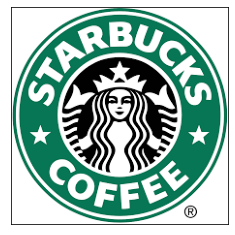

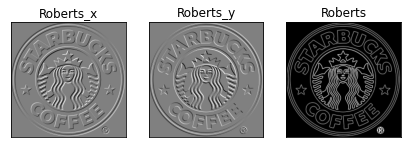

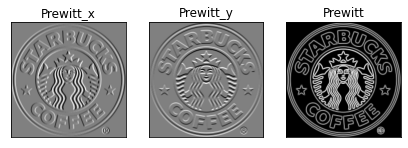

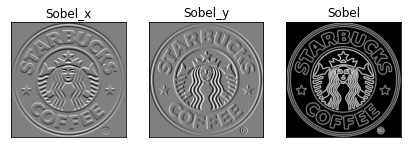

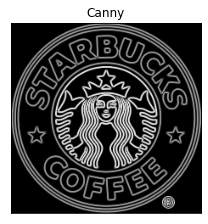

In [32]:
img = io.imread("images/logo.png")
plt.imshow(img) #Visualizing a figure with the image
plt.xticks([])
plt.yticks([])
plt.show() 

img_gray = rgb2gray(rgba2rgb(img))

#Roberts filter
mask_x = np.array([[1,0],[0,-1]], dtype='float')
mask_y = np.array([[0,-1],[1,0]], dtype='float')
im_roberts_x=convolve(img_gray,mask_x)
im_roberts_y=convolve(img_gray,mask_y)
im_roberts = ski.filters.roberts(img_gray)

#Prewitt filter
mask_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype='float')
mask_y = np.array([[1,1,1],[0,0,0],[-1,-1,-1]], dtype='float')
im_prewitt_x=convolve(img_gray,mask_x)
im_prewitt_y=convolve(img_gray,mask_y)
im_prewitt = np.sqrt(sum([filters.prewitt(img_gray, axis=i)**2
                   for i in range(img_gray.ndim)]) / img_gray.ndim)

#Sobel filter
im_sobel_h = ski.filters.sobel_h(img_gray)
im_sobel_v = ski.filters.sobel_v(img_gray)
im_sobel=np.sqrt(sum([filters.sobel(img_gray, axis=i)**2
                     for i in range(img_gray.ndim)]) / img_gray.ndim)

#Canny filter
im_canny= feature.canny(img_gray, sigma=5)

plot_edges(im_roberts_x,im_roberts_y,im_roberts,im_prewitt_x,im_prewitt_y,im_prewitt,im_sobel_h,im_sobel_v,im_sobel,im_canny)

#1) The best countour detection depends on each image, but we usually expect Sobel and Canny techniques 
#to find the most edges.
#2) Since this image contains a circle, to detect the edges correctly it is advised to use 2-dimensional convolutions.
#3) It is not necessary to normalize the mask, because the sum of the mask is 0, and it has to be 0, because this
#will make a homogenous image (that has no contrast) give a derivative of 0,so it will not detect an edge.

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

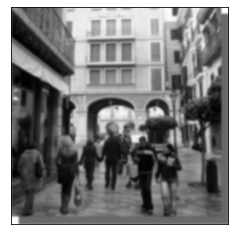

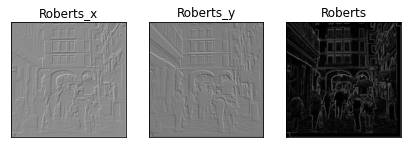

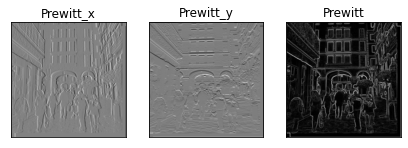

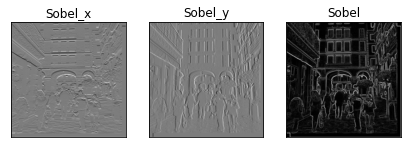

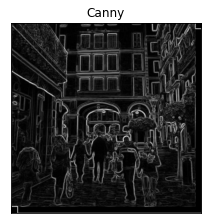

In [33]:
#your solution
img = io.imread("images/street.png")

img_gray = rgb2gray(rgba2rgb(img))
#im_gaus_der11=filters.gaussian_filter(img_gray, 1, order=[1,1])
gauss = ski.filters.gaussian(img_gray, sigma=2)

plt.imshow(gauss, cmap='gray') #Visualizing a figure with the image
plt.xticks([])
plt.yticks([])
plt.show()

#Roberts filter
mask_x = np.array([[1,0],[0,-1]], dtype='float')
mask_y = np.array([[0,-1],[1,0]], dtype='float')
im_roberts_x=convolve(img_gray,mask_x)
im_roberts_y=convolve(img_gray,mask_y)
im_roberts = ski.filters.roberts(img_gray)

#Prewitt filter
mask_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype='float')
mask_y = np.array([[1,1,1],[0,0,0],[-1,-1,-1]], dtype='float')
im_prewitt_x=convolve(img_gray,mask_x)
im_prewitt_y=convolve(img_gray,mask_y)
im_prewitt = np.sqrt(sum([filters.prewitt(img_gray, axis=i)**2
                   for i in range(img_gray.ndim)]) / img_gray.ndim)

#Sobel filter
im_sobel_h = ski.filters.sobel_h(img_gray)
im_sobel_v = ski.filters.sobel_v(img_gray)
im_sobel=np.sqrt(sum([filters.sobel(img_gray, axis=i)**2
                     for i in range(img_gray.ndim)]) / img_gray.ndim)

#Canny filter
im_canny= feature.canny(img_gray, sigma=5)

plot_edges(im_roberts_x,im_roberts_y,im_roberts,im_prewitt_x,im_prewitt_y,im_prewitt,im_sobel_h,im_sobel_v,im_sobel,im_canny)

#1) If we smooth the image before we apply an edge detection algorithm we reduce the noise of the image,
#so the algorithm finds the edges that truly correspond to an edge of the image. However, it also smooths some
#edges of the image, so it finds less edges on the image
#2) The limitations are that this algorithm only finds edges of objects that differ in color, while humans also
#consider the objects we are trying to separate and their usual color, shape, size...
#The algorithms can be improved using Hysteresis thresholding to start edge curves and the low threshold to
#continue them.

c) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


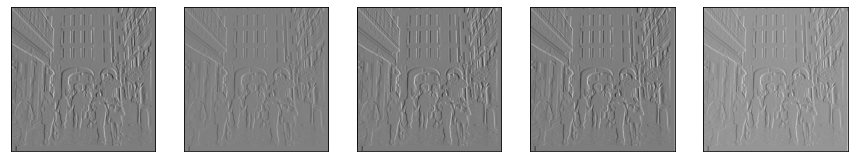

In [34]:
#your solution
image = io.imread("images/street.png")
img_gray = rgb2gray(rgba2rgb(image))

fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,5,1)
image_reflect = filters.sobel(img_gray, mode="reflect")
plt.imshow(image_reflect, cmap='gray') #Visualizing a figure with the image
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,5,2)
image_constant = filters.sobel(img_gray, mode="constant")
plt.imshow(image_constant, cmap='gray') #Visualizing a figure with the image
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,5,3)
image_nearest = filters.sobel(img_gray, mode="nearest")
plt.imshow(image_nearest, cmap='gray') #Visualizing a figure with the image
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,5,4)
image_mirror = filters.sobel(img_gray, mode="mirror")
plt.imshow(image_mirror, cmap='gray') #Visualizing a figure with the image
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,5,5)
image_wrap = filters.sobel(img_gray, mode="wrap")
plt.imshow(image_wrap, cmap='gray') #Visualizing a figure with the image
plt.xticks([])
plt.yticks([])
plt.show()

#the Sobel detector has 5 modes: ‘reflect’, ‘constant’, ‘nearest’, ‘mirror’ and ‘wrap’.

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

In [4]:
def plot_hybrid(img1, img2, msg1, msg2):
    fig=plt.figure(figsize=(7,7))
    fig.add_subplot(1,2,1)
    plt.imshow(img1, cmap='gray') #Visualizing a figure with the image
    plt.title(msg1)
    plt.xticks([])
    plt.yticks([])

    fig.add_subplot(1,2,2)
    plt.imshow(img2, cmap='gray') #Visualizing a figure with the image
    plt.title(msg2)
    plt.xticks([])
    plt.yticks([])

<ipython-input-5-7d08e8e340f1>:9: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  einstein_gray = rgb2gray((einstein))
<ipython-input-5-7d08e8e340f1>:10: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  monroe_gray = rgb2gray((monroe))


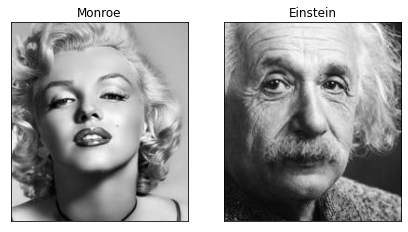

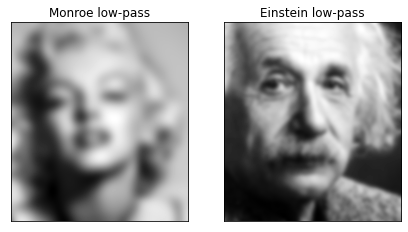

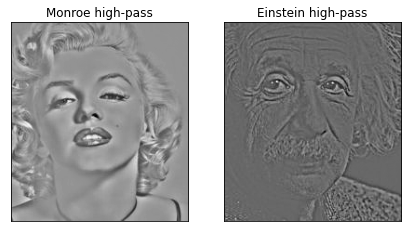

In [5]:
#your solution
einstein = io.imread("images/Einstein.jpg")
monroe = io.imread("images/monroe.jpg")

plot_hybrid(monroe, einstein, 'Monroe', 'Einstein')

einstein = einstein.astype(np.float)
monroe = monroe.astype(np.float)
einstein_gray = rgb2gray((einstein))
monroe_gray = rgb2gray((monroe))
#The low pass filter is obtained by applying a gaussian filter
#We use different sigmas for each of them because that helps with the effect we are trying to achieve
low_pass_eins = ski.filters.gaussian(einstein_gray, sigma=2)
low_pass_mon = ski.filters.gaussian(monroe_gray, sigma=5)
#The high pass filter is obtained by subtracting the filtered image from the original
high_pass_eins = einstein - low_pass_eins
high_pass_mon = monroe - low_pass_mon

plot_hybrid(low_pass_mon, low_pass_eins, 'Monroe low-pass', 'Einstein low-pass')

plot_hybrid(high_pass_mon, high_pass_eins, 'Monroe high-pass', 'Einstein high-pass')

b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

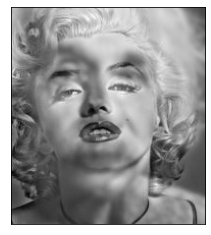

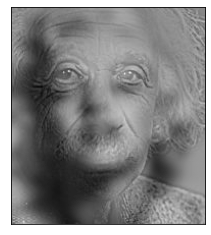

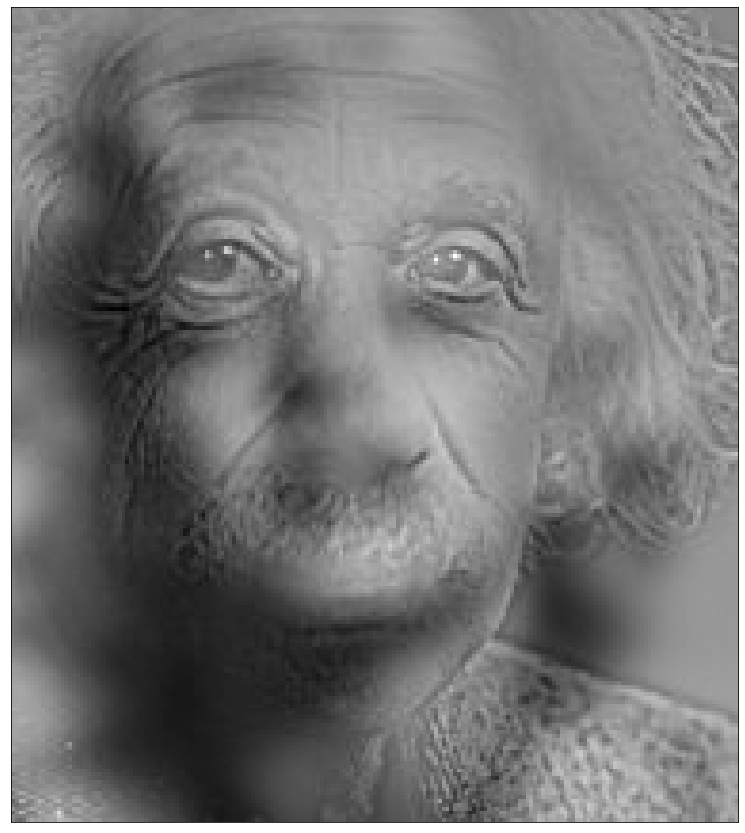

In [17]:
#your solution
hybrid = low_pass_eins + high_pass_mon

plt.imshow(hybrid, cmap='gray') #Visualizing a figure with the image
plt.xticks([])
plt.yticks([])
plt.show()

hybrid = high_pass_eins + low_pass_mon

plt.imshow(hybrid, cmap='gray') #Visualizing a figure with the image
plt.xticks([])
plt.yticks([])
plt.show()

#cat = io.imread("images/cat.jpg")
#hybrid =resize(hybrid,(cat.shape[0],cat.shape[1]))
fig=plt.figure(figsize=(15,15))
fig.add_subplot(1,1,1)
#hybrid=resize(hybrid,(hybrid.shape[0], int(hybrid.shape[1] * 1.5)))
plt.imshow(hybrid, cmap='gray') #Visualizing a figure with the image
plt.xticks([])
plt.yticks([])
plt.show()
#We see that if we look at the image from close, Marylin is seen on the first picture (when she is high pass),
#but if we look at the image from a further distance, Marylin can be seen on the second picture, when she is low pass.

c) **(Optional)**

Compute hybrid images from other images. Apply it over color images.

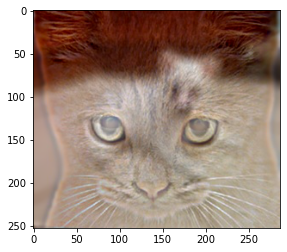

In [57]:
#your solution
#We use the images of the dog and the cat, the dog will be low pass and the cat will be high pass
cat = io.imread("images/cat.jpg")
dog = io.imread("images/dog.jpg")
dog =resize(dog,(cat.shape[0],cat.shape[1]))
dog=img_as_float(dog)
cat=img_as_float(cat)
#Since the images are in rgb, we have to convolve them by each channel separately
mask3=np.ones((15,15))*(1.0/(15*15))
cat_smooth=cat.copy()
cat_smooth[:,:,0]=ndimage.convolve(cat[:,:,0], weights=mask3)
cat_smooth[:,:,1]=ndimage.convolve(cat[:,:,1], weights=mask3)
cat_smooth[:,:,2]=ndimage.convolve(cat[:,:,2], weights=mask3)

dog_smooth=dog.copy()
dog_smooth[:,:,0]=ndimage.convolve(dog[:,:,0], weights=mask3)
dog_smooth[:,:,1]=ndimage.convolve(dog[:,:,1], weights=mask3)
dog_smooth[:,:,2]=ndimage.convolve(dog[:,:,2], weights=mask3)
cat_high_pass = cat - cat_smooth
hand_high_pass=dog - dog_smooth
hybrid = dog_smooth + cat_high_pass

hybrid=img_as_ubyte(hybrid)
plt.imshow(hybrid) #Visualizing a figure with the image
plt.show()

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code, you do not need to implement anything.

<ipython-input-63-5a8e3c562076>:15: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  bigbang_imgs_gauss.append(ski.filters.gaussian(i, sigma=3))


<IPython.core.display.Javascript object>


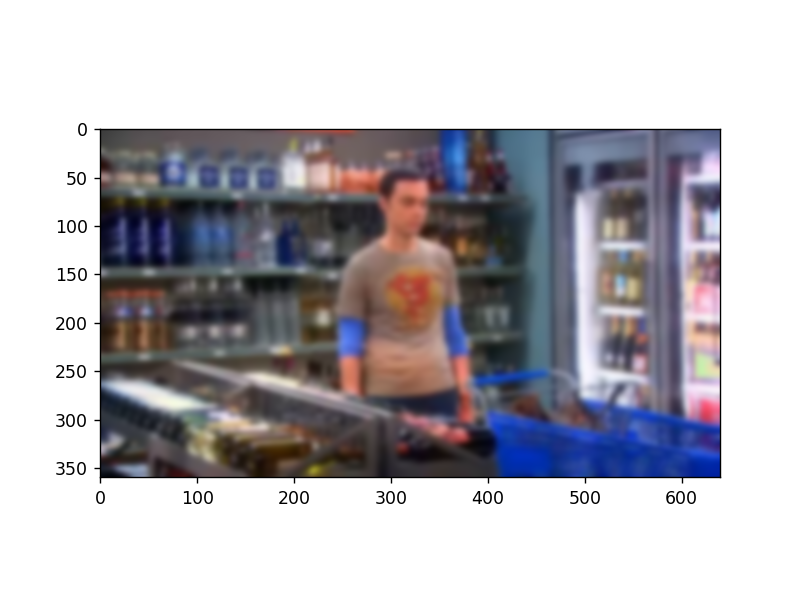

In [63]:
#your solution
#We visualize the original video and then the anonimized video
%matplotlib nbagg 
from skimage.io import ImageCollection
from matplotlib import pyplot as plt, animation as anim
import PIL

bigbang_imgs = ImageCollection('images/bigbangcollection/*.png')
total_film_frames = len(bigbang_imgs)

bigbang_imgs_gauss = []
for i in bigbang_imgs:
    bigbang_imgs_gauss.append(i)

for i in bigbang_imgs:
    bigbang_imgs_gauss.append(ski.filters.gaussian(i, sigma=3))

#generates the next frame
def frame_update(frame_num) :
    act_img.set_array(bigbang_imgs_gauss[frame_num])
    return act_img

#visualize the video using FuncAnimation
fig = plt.figure()
act_img = plt.imshow(bigbang_imgs_gauss[0], animated = True)
ani = anim.FuncAnimation(fig, frame_update, frames = total_film_frames*2, interval = 20, repeat = False)
plt.show()